In [77]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import matplotlib.pyplot as plt

In [78]:
df = pd.read_csv('MyNFLDS.csv')

# Removing 6 of the lowest scoring features

In [79]:
df = df.drop(columns=["T0 TDs", "T1 TDs", "T0 Field Goals", "T1 Field Goals", "T0 Points", "T1 Points", "Home Team", "T0 Penalty Yrds", "T0 Passing Yrds", "T0 Avg Rush Yrds/Att", "T1 Total Plays", "T1 Avg Rush Yrds/Att", "T0 Total Plays"])

In [80]:
colInd = len(df.axes[1]) - 1
print(colInd)

20


In [81]:
dataset = df.values

In [82]:
dataset

array([[  4., 134., 464., ...,   0.,   2.,   1.],
       [  4.,  56., 507., ...,   3.,   8.,   0.],
       [  2.,  57., 293., ...,   0.,   2.,   1.],
       ...,
       [  2.,  84., 344., ...,   2.,   7.,   0.],
       [  3.,  65., 185., ...,   0.,   0.,   1.],
       [  0.,  70., 323., ...,   2.,   4.,   0.]])

In [83]:
X = dataset[:,0:colInd]

In [84]:
Y = dataset[:,colInd]

In [85]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [86]:
X_scale

array([[0.8       , 0.45220588, 0.676     , ..., 0.67857143, 0.        ,
        0.22222222],
       [0.8       , 0.16544118, 0.762     , ..., 0.57142857, 0.6       ,
        0.88888889],
       [0.4       , 0.16911765, 0.334     , ..., 1.        , 0.        ,
        0.22222222],
       ...,
       [0.4       , 0.26838235, 0.436     , ..., 0.07142857, 0.4       ,
        0.77777778],
       [0.6       , 0.19852941, 0.118     , ..., 0.75      , 0.        ,
        0.        ],
       [0.        , 0.21691176, 0.394     , ..., 0.21428571, 0.4       ,
        0.44444444]])

In [87]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size = 0.15)

In [88]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size = 0.5)

In [89]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(434, 20) (38, 20) (39, 20) (434,) (38,) (39,)


In [90]:
modelA = Sequential([
    Dense(8, activation = 'relu', input_shape = (colInd,)),
    Dense(8, activation = 'relu'),
    
    Dropout(.5),
    
    Dense(16, activation = 'relu'),
    Dense(16, activation = 'relu'),
    
    Dense(32, activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(64, activation = 'relu'),
    
    Dense(1, activation = 'sigmoid'),])

In [91]:
modelA.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [92]:
hist = modelA.fit(X_train, Y_train, batch_size = 5, epochs = 75, validation_data = (X_val, Y_val))

Epoch 1/75
87/87 [==============================] - 1s 4ms/step - loss: 0.6934 - accuracy: 0.5115 - val_loss: 0.6736 - val_accuracy: 0.7105
Epoch 2/75
87/87 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.5622 - val_loss: 0.6616 - val_accuracy: 0.7105
Epoch 3/75
87/87 [==============================] - 0s 2ms/step - loss: 0.6878 - accuracy: 0.5622 - val_loss: 0.6558 - val_accuracy: 0.7105
Epoch 4/75
87/87 [==============================] - 0s 2ms/step - loss: 0.6865 - accuracy: 0.5622 - val_loss: 0.6526 - val_accuracy: 0.7105
Epoch 5/75
87/87 [==============================] - 0s 2ms/step - loss: 0.6863 - accuracy: 0.5622 - val_loss: 0.6526 - val_accuracy: 0.7105
Epoch 6/75
87/87 [==============================] - 0s 2ms/step - loss: 0.6856 - accuracy: 0.5622 - val_loss: 0.6496 - val_accuracy: 0.7105
Epoch 7/75
87/87 [==============================] - 0s 2ms/step - loss: 0.6844 - accuracy: 0.5622 - val_loss: 0.6455 - val_accuracy: 0.7105
Epoch 8/75
87/87 [==

In [93]:
modelA.save("NFLmodelANewDS")

INFO:tensorflow:Assets written to: NFLmodelANewDS\assets


INFO:tensorflow:Assets written to: NFLmodelANewDS\assets


# New Feature Set SVM

In [94]:
from sklearn.svm import SVC
linSvc = SVC(kernel = 'linear', gamma = 'auto', probability = True)
linSvc.fit(X_train, Y_train)

SVC(gamma='auto', kernel='linear', probability=True)

In [95]:
from sklearn.metrics import accuracy_score
pred1 = linSvc.predict(X_test)
print("Accuracy on unknown data is",accuracy_score(Y_test, pred1))

Accuracy on unknown data is 0.7692307692307693


C:\Users\hunte\anaconda3\envs\py\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


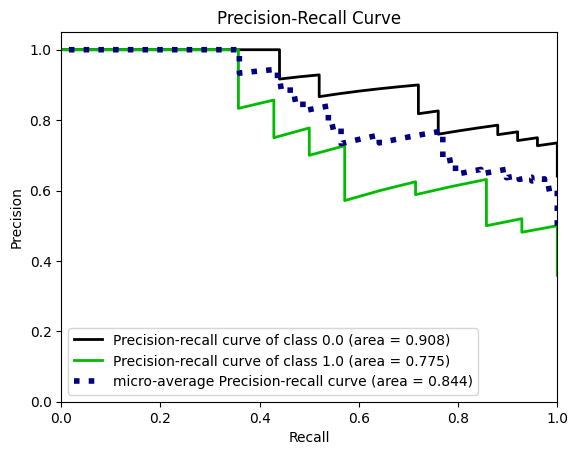

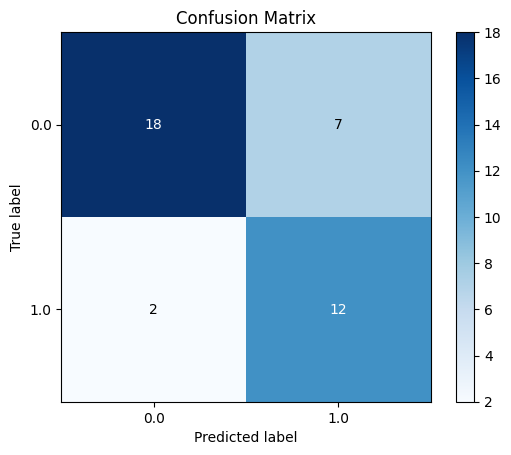

In [96]:
import os
#import cv2
import seaborn as sns
import scikitplot as skplt
prob = linSvc.predict_proba(X_test)
skplt.metrics.plot_precision_recall_curve(Y_test, prob)
skplt.metrics.plot_confusion_matrix(Y_test, pred1)
plt.show()

# New Feature Set Random Forest

In [97]:
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier

In [98]:
# create the classifier
classifier = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets
classifier.fit(X_train, Y_train)

RandomForestClassifier()

In [99]:
# predictin on the test set
y_pred = classifier.predict(X_test)

In [100]:
from sklearn.metrics import accuracy_score

# Calculate Model Accuracy
print("Accuracy:", accuracy_score(Y_test, y_pred))

Accuracy: 0.6153846153846154


In [101]:
dfList = df.columns.values.tolist()
dfList = dfList[:-1]

In [102]:
impRFFeatures = pd.DataFrame(
    {"feature": dfList, "importance": classifier.feature_importances_}
).sort_values("importance", ascending=False)

impRFFeatures

,feature,importance
13,T1 Avg Pass Yrds/Att,0.125486
3,T0 Avg Pass Yrds/Att,0.096457
11,T1 Rushing Yrds,0.087558
1,T0 Rushing Yrds,0.066885
18,T1 Interceptions,0.062653
16,T1 TOP (min),0.057931
5,T0 TOP (min),0.057727
12,T1 Total Yrds,0.046894
10,T1 Passing Yrds,0.046514
19,T1 Sacked,0.045893


From these 3 models the neural network seemed to perform around the same as the previous set. However, both the SVM and the Random Forest performed worse